In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("diabetes.csv")

print(data.head())

print(data.info())
print(data.isnull().sum())
print(data.describe())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [ ]:
missing_cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

for col in missing_cols:
    data[col] = data[col].replace(0, np.nan)
    data[col].fillna(data[col].mean(), inplace=True)

print(data.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


/var/folders/h4/x913z7894d58b8vmcq9dcn5w0000gn/T/ipykernel_5960/3439008807.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [ ]:
X = data.drop(columns=["Outcome"]).values
y = data["Outcome"].values

def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    test_size = int(len(X) * test_size)
    test_idx, train_idx = indices[:test_size], indices[test_size:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(538, 8) (230, 8) (538,) (230,)


In [ ]:
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    nearest_idx = np.argsort(distances)[:k]
    nearest_labels = y_train[nearest_idx]
    return np.bincount(nearest_labels).argmax()

def knn_predict(X_test, X_train, y_train, k=3):
    return np.array([knn_predict_single(x, X_train, y_train, k) for x in X_test])

def compute_accuracy(y_true, y_pred):
    return (np.sum(y_true == y_pred) / len(y_true)) * 100

preds = knn_predict(X_test, X_train, y_train, k=3)
acc = compute_accuracy(y_test, preds)
print(f"Accuracy: {acc:.2f}%")


Accuracy: 70.00%


In [ ]:
X_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y, test_size=0.3)

preds_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
acc_scaled = compute_accuracy(y_test_s, preds_scaled)

print(f"Accuracy (Original): {acc:.2f}%")
print(f"Accuracy (Scaled): {acc_scaled:.2f}%")


Accuracy (Original): 70.00%
Accuracy (Scaled): 71.30%


k=1, Accuracy=67.83%
k=2, Accuracy=70.43%
k=3, Accuracy=70.00%
k=4, Accuracy=70.87%
k=5, Accuracy=67.39%
k=6, Accuracy=68.70%
k=7, Accuracy=68.26%
k=8, Accuracy=69.13%
k=9, Accuracy=69.13%
k=10, Accuracy=70.87%
k=11, Accuracy=70.87%
k=12, Accuracy=71.30%
k=13, Accuracy=71.30%
k=14, Accuracy=72.17%
k=15, Accuracy=73.48%
k=1, Accuracy=66.09%
k=2, Accuracy=70.43%
k=3, Accuracy=71.30%
k=4, Accuracy=72.61%
k=5, Accuracy=71.30%
k=6, Accuracy=72.61%
k=7, Accuracy=75.22%
k=8, Accuracy=73.04%
k=9, Accuracy=72.61%
k=10, Accuracy=72.61%
k=11, Accuracy=71.74%
k=12, Accuracy=72.61%
k=13, Accuracy=73.04%
k=14, Accuracy=75.65%
k=15, Accuracy=73.91%


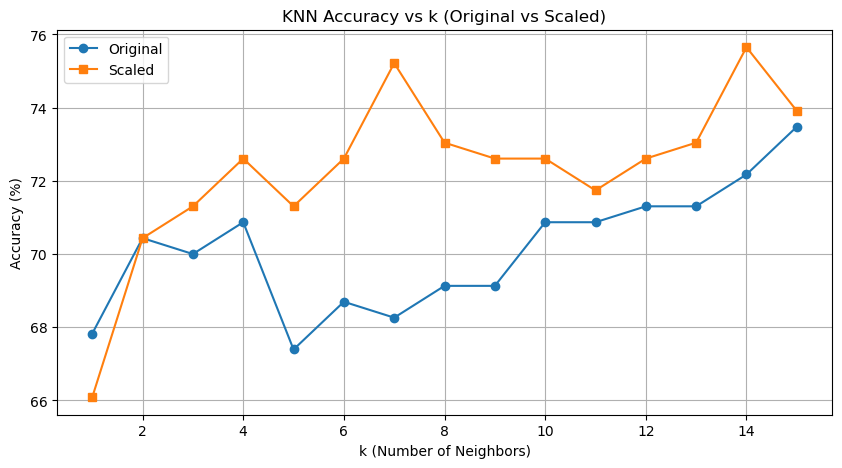

In [27]:
import matplotlib.pyplot as plt

def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    results = {}
    for k in k_values:
        preds = knn_predict(X_test, X_train, y_train, k)
        acc = compute_accuracy(y_test, preds)
        results[k] = acc
        print(f"k={k}, Accuracy={acc:.2f}%")
    return results

k_values = range(1, 16)
acc_original = experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)

acc_scaled = experiment_knn_k_values(X_train_s, y_train_s, X_test_s, y_test_s, k_values)

plt.figure(figsize=(10,5))
plt.plot(list(acc_original.keys()), list(acc_original.values()), marker='o', label="Original")
plt.plot(list(acc_scaled.keys()), list(acc_scaled.values()), marker='s', label="Scaled")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy (%)")
plt.title("KNN Accuracy vs k (Original vs Scaled)")
plt.legend()
plt.grid(True)
plt.show()


### Problem 4: Discussion



**Challenges of k-NN:**

- Computationally expensive for large datasets since distances must be calculated for every query.

- Suffers from the *curse of dimensionality*: in high-dimensional data, distances become less meaningful.

- Requires storing the entire dataset in memory, which is inefficient for very large datasets.

- Sensitive to irrelevant or unscaled features, which can distort distance calculations.



**Strategies to Improve Efficiency:**

- Use Approximate Nearest Neighbors (e.g., KD-Trees, Ball Trees, Locality Sensitive Hashing) to reduce search time.

- Apply dimensionality reduction techniques (e.g., PCA, t-SNE) to make distances more meaningful.

- Normalize or standardize features so they contribute equally to distance metrics.

- Perform feature selection to remove irrelevant or redundant attributes.

- Parallelize distance computations using modern hardware (multi-core CPUs or GPUs).



**Conclusion:**

While k-NN is simple and intuitive, it becomes inefficient with large or high-dimensional datasets. Scaling, dimensionality reduction, and approximate search methods can significantly improve its performance.
